<h1>Student Performance<h1>

<h3>Project Stages<h3>


* Formulate  the problem
* Load the Data
* Data Exploration
* Clean The Data
* Discover and Visualize the Data to Gain Insights
* Looking for Correlations
* Prepare the Data for Machine Learning Algorithms
* Save Cleaned Data and Download it
* creat the model
* Visualize the Result

<h2>Formulate  the problem</h2><br>
we want to predict Math final grade based in students performance 

<h2> Load the Data </h2>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'math-raw.csv'

df = pd.read_csv(file_path)
df


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,?,4,1,1,3,NaN,5.0,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,?,3,1,1,3,NaN,5.0,5,6
2,GP,Female,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10.0,7.0,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2.0,15.0,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4.0,6.0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20.0,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11.0,9.0,9,9
391,MS,M,17.0,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3.0,14.0,16,16
392,MS,M,21.0,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3.0,10.0,8,7
393,MS,M,18.0,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0.0,11.0,12,10


<h2> Data Exploration </h2>

In [2]:
df.dtypes

school         object
sex            object
age           float64
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu            int64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures      float64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel          int64
freetime       object
goout           int64
Dalc            int64
Walc            int64
health          int64
absences      float64
G1            float64
G2              int64
G3              int64
dtype: object

In [3]:
for col in df.columns:
    print("Unique values of column ", col, ": ", df[col].unique())

Unique values of column  school :  ['GP' nan 'MS']
Unique values of column  sex :  ['F' 'Female' 'Male' 'M' nan]
Unique values of column  age :  [18. 17. 15. 16. nan 19. 22. 20. 21.]
Unique values of column  address :  ['U' nan 'R']
Unique values of column  famsize :  ['GT3' 'LE3']
Unique values of column  Pstatus :  ['A' 'T']
Unique values of column  Medu :  [4 1 3 2 0]
Unique values of column  Fedu :  [4 1 2 3 0]
Unique values of column  Mjob :  ['at_home' 'health' 'other' 'services' 'teacher']
Unique values of column  Fjob :  ['teacher' 'other' 'services' 'health' 'at_home']
Unique values of column  reason :  ['course' 'other' 'home' 'reputation']
Unique values of column  guardian :  ['mother' 'father' 'other']
Unique values of column  traveltime :  [2 1 3 4]
Unique values of column  studytime :  [2 3 1 4]
Unique values of column  failures :  [nan  3.  0.  2.  1.]
Unique values of column  schoolsup :  ['yes' 'no']
Unique values of column  famsup :  ['no' 'yes']
Unique values of colu

obtain a statistical summary of the dataframe

In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,Dalc,Walc,health,absences,G1,G2,G3
count,394.000000,395.000000,395.000000,395.000000,395.000000,393.000000,395.000000,395.000000,395.000000,395.000000,395.000000,393.000000,393.000000,395.000000,395.000000
mean,16.695431,2.749367,2.521519,1.448101,2.035443,0.335878,3.944304,3.108861,1.481013,2.291139,3.554430,5.712468,10.913486,10.713924,10.415190
std,1.277573,1.094735,1.088201,0.697505,0.839240,0.745161,0.896659,1.113278,0.890741,1.287897,1.390303,8.023007,3.327015,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


<h2> Clean The Data </h2>

find missing values


In [5]:
df.isnull().sum()

school        22
sex            1
age            1
address        1
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
studytime      0
failures       2
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       2
G1             2
G2             0
G3             0
dtype: int64

<Axes: >

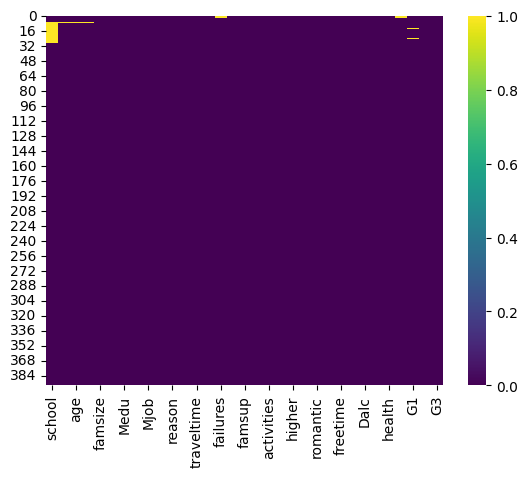

In [6]:
sns.heatmap(df.isnull(), cmap='viridis')

<h4>Convert "?" to NaN</h4>


In [7]:
df.replace("?", np.nan, inplace=True)
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,NaN,4,1,1,3,NaN,5.0,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,NaN,3,1,1,3,NaN,5.0,5,6
2,GP,Female,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10.0,7.0,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2.0,15.0,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4.0,6.0,10,10
5,GP,Male,16.0,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10.0,15.0,15,15
6,GP,M,16.0,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0.0,12.0,12,11
7,NaN,NaN,NaN,NaN,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6.0,6.0,5,6
8,NaN,M,15.0,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0.0,16.0,18,19
9,NaN,M,15.0,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0.0,14.0,15,15


deal with missing data in column (shcool) by droping missing column

In [8]:
df.dropna(subset=['school'] , axis=0 , inplace=True)
df['school'].isnull().sum()

0

deal with missing data in column (failures) replace by frequency

In [9]:
df['failures']=df['failures'].fillna(df['failures'].value_counts().idxmax())
df['failures'].isnull().sum()

0

deal with missing data in column ( absences ) replace by frequency

In [11]:
df['absences']=df['absences'].fillna(df['absences'].value_counts().idxmax())

df['absences'].isnull().sum()

0

deal with missing data in column ( freetime ) replace by mean

In [12]:

avg_free=df["freetime"].astype("float").mean(axis=0)
df["freetime"].replace(np.nan ,avg_free , inplace=True )

df['freetime'].isnull().sum()

0

<h3>Correct data format</h3>

In [13]:
df['age'] = df['age'].astype('int')
df['failures'] = df['failures'].astype('int')
df['G2'] = df['G2'].astype('float')
df['G3'] = df['G3'].astype('float')
df['absences'] = df['absences'].astype('int')
df['freetime'] = df['freetime'].astype('int')

<h4> remove duplicates </h4>

In [14]:
df = df.drop_duplicates()

<h3>Data Standardization</h3>
Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.

In [15]:
df.replace("F", 'Female', inplace = True)
df.replace("M", 'Male', inplace = True)
df['sex'].unique()

array(['Female', 'Male'], dtype=object)

<h4>Identify Outliers </h4>

<Axes: >

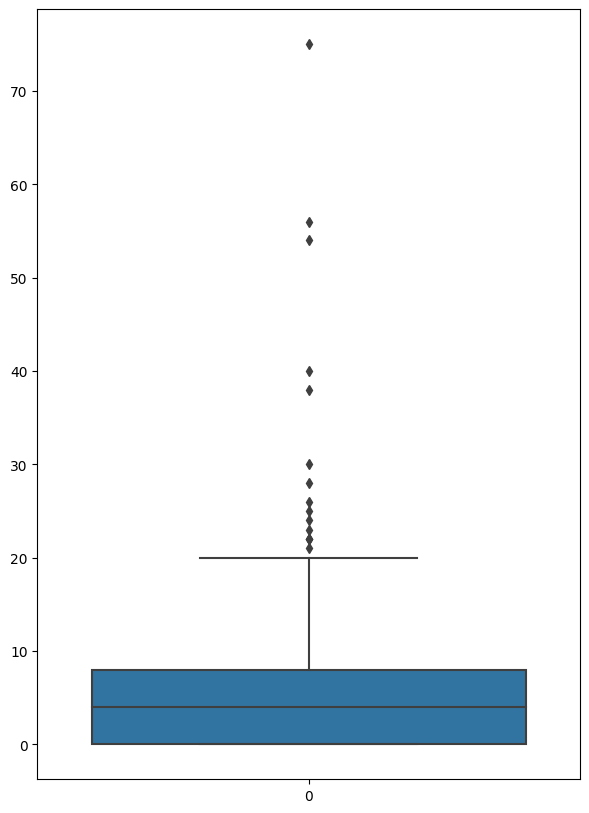

In [16]:
plt.figure(figsize=(7,10))
sns.boxplot(df['absences'].values, orient='v',)

<h4> Remove outliers</h4>

<Axes: >

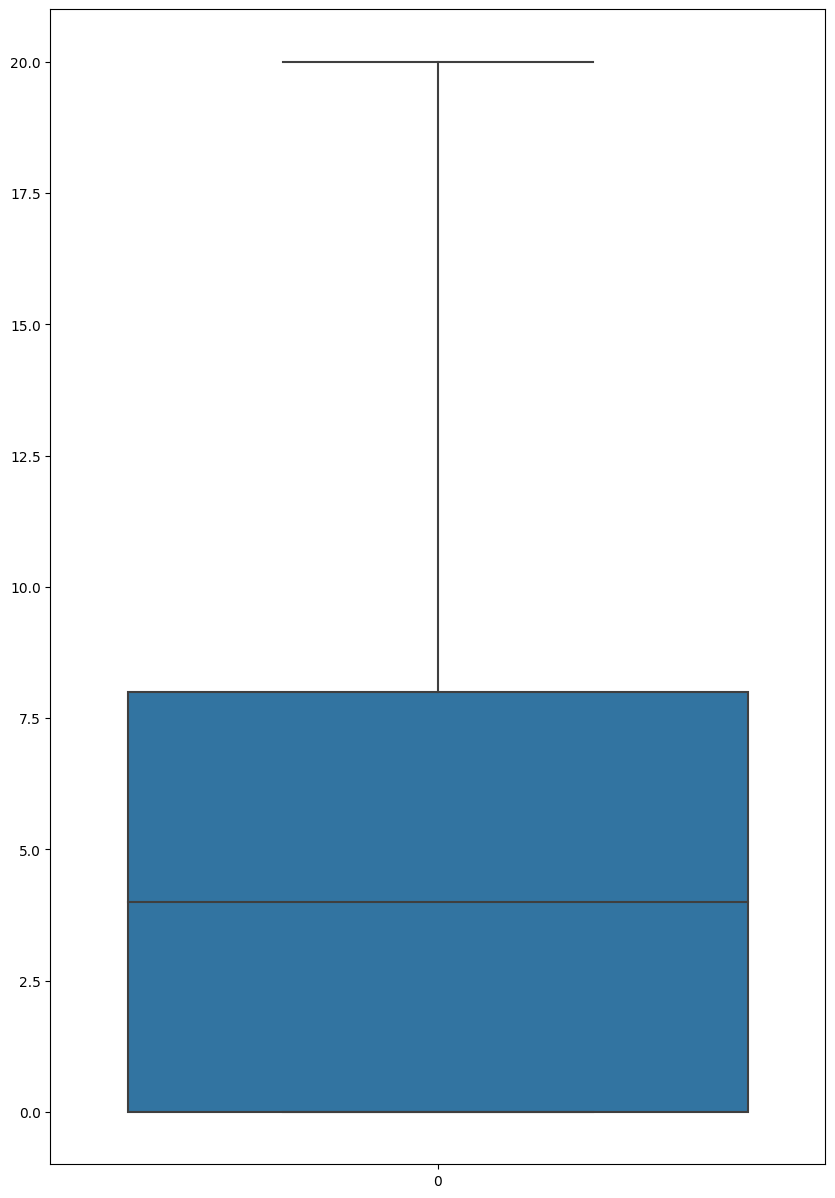

In [17]:
df['absences'] = df['absences'].clip(0, 20)
plt.figure(figsize=(10,15))
sns.boxplot(df['absences'].values, orient='v')

<h4>Discover and Visualize the Data to Gain Insights</h4>

<Axes: xlabel='school', ylabel='count'>

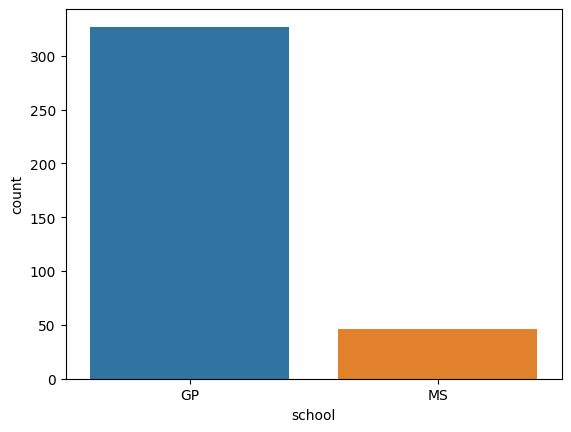

In [48]:

sns.countplot(x='school',data=df, palette='tab10')



<Axes: xlabel='health', ylabel='count'>

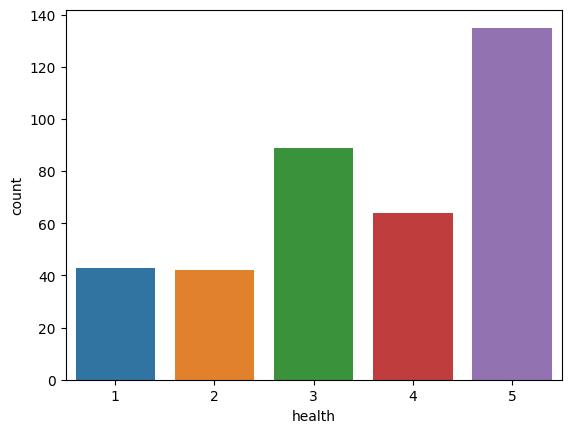

In [49]:
sns.countplot(x='health',data=df, palette='tab10')

<h4>Relationships Between Variables</h4>

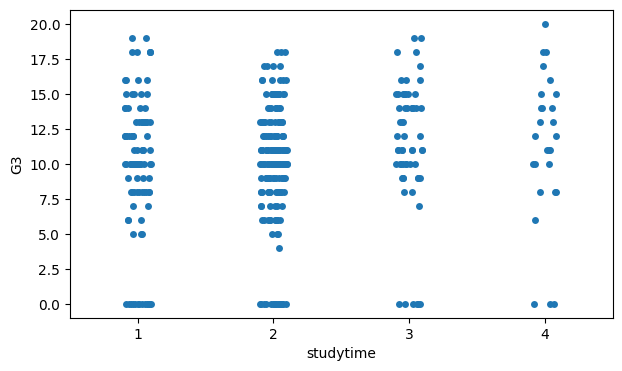

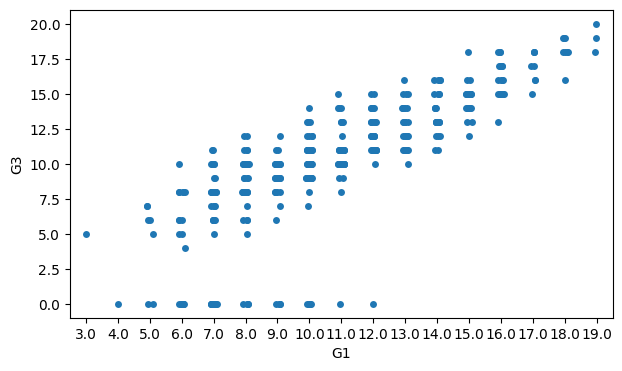

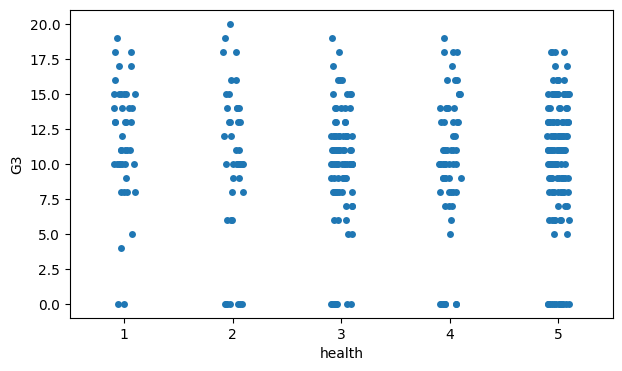

In [50]:
plt.figure(figsize=(7, 4))
sns.stripplot(x="studytime", y="G3", data=df);

plt.figure(figsize=(7, 4))
sns.stripplot(x="G1", y="G3", data=df);


plt.figure(figsize=(7, 4))
sns.stripplot(x="health", y="G3", data=df);

<h4>Weak and Strong Relationships<h4>

<Axes: xlabel='G2', ylabel='G3'>

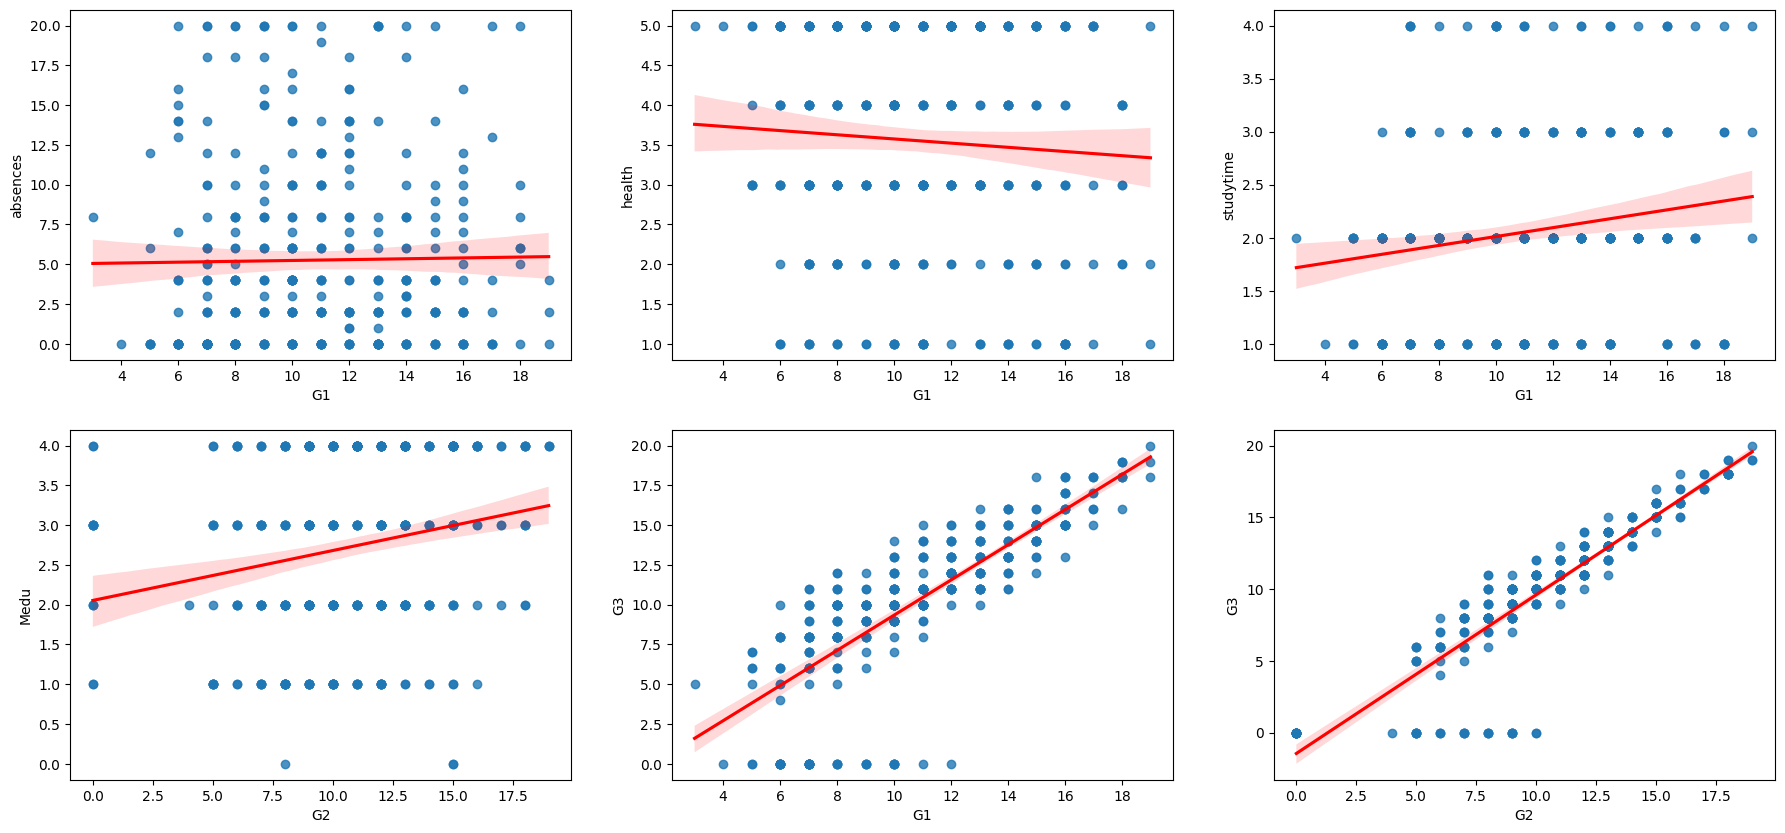

In [39]:
plt.figure(figsize=(22,10))

plt.subplot(231)#subplot to add a subplot to the current figure
sns.regplot(x='G1', y='absences', data=df,  line_kws={'color': 'red'}) 

plt.subplot(232)
sns.regplot(x='G1', y='health', data=df , line_kws={'color': 'red'})

plt.subplot(233)
sns.regplot(x='G1', y='studytime', data=df , line_kws={'color': 'red'})

plt.subplot(234)
sns.regplot(x='G2', y='Medu', data=df,  line_kws={'color': 'red'})

plt.subplot(235)
sns.regplot(x='G1', y='G3', data=df , line_kws={'color': 'red'})
                    
plt.subplot(236)
sns.regplot(x='G2', y='G3', data=df,  line_kws={'color': 'red'})


                    


G1 , G2 , G3 , Medu and studytime have strong relationship,while absences and health have weak relationship


<h4>Looking for Correlations</h4>

<Axes: >

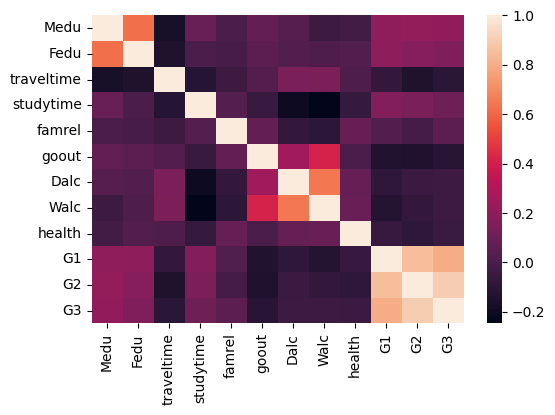

In [43]:

numeric_cols = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_cols.corr())

<h4>Feature  Engineering</h4>
select Features

In [44]:
selected_features = ['G1', 'G2', 'G3','studytime', 'Medu',]
df_final = df[selected_features]
df_final

,G1,G2,G3,studytime,Medu
0,5.0,6.0,6.0,2,4
1,5.0,5.0,6.0,2,1
2,7.0,8.0,10.0,2,1
3,15.0,14.0,15.0,3,4
4,6.0,10.0,10.0,2,3
...,...,...,...,...,...
390,9.0,9.0,9.0,2,2
391,14.0,16.0,16.0,1,3
392,10.0,8.0,7.0,1,1
393,11.0,12.0,10.0,1,3


In [51]:
df_final.to_csv('Student_cleaned_data.csv')

In [52]:
file_path = 'Student_cleaned_data.csv'

df = pd.read_csv(file_path)

<h4> Create the model</h4>

In [53]:
columns = ['G1', 'G2','studytime', 'Medu']
labels = df_final['G3'].values
features = df_final[list(columns)].values

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)

In [55]:
from sklearn import linear_model

# Bulid a new Model
regression = linear_model.LinearRegression()

# Train the Model
regression.fit(X_train, y_train)

LinearRegression()

In [56]:
# Predict for training set
y_train_predict = regression.predict(X_train)

# Predict for training set
y_test_predict = regression.predict(X_test)

In [57]:
from sklearn.metrics import mean_squared_error , mean_absolute_error


# # model evaluation for training set
mse_train = mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))
print("---------------------------------------")

# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
mae_test = mean_absolute_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))

print("---------------------------------------")
test_score= regression.score(X_test, y_test)# Return R2 score . The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse) 
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))


The model performance for training set
RMSE is 2.0013920238935605
MAE is 1.2078120988811782
---------------------------------------
The model performance for testing set
RMSE is 1.8959009677752106
MAE is 1.165254676580012
---------------------------------------
The score of model for testing set
Test score 0.8


In [58]:
compare={"Actual": y_test, "Predict": y_test_predict}
pd.DataFrame(compare)

,Actual,Predict
0,6.0,6.218568
1,10.0,9.616065
2,11.0,11.542549
3,8.0,6.109303
4,15.0,14.839063
...,...,...
107,11.0,11.707733
108,12.0,12.884619
109,10.0,10.859184
110,13.0,14.284100


<h4>Visualize the Result</h4>

In [60]:
idx= np.random.choice(X_test.shape[0])


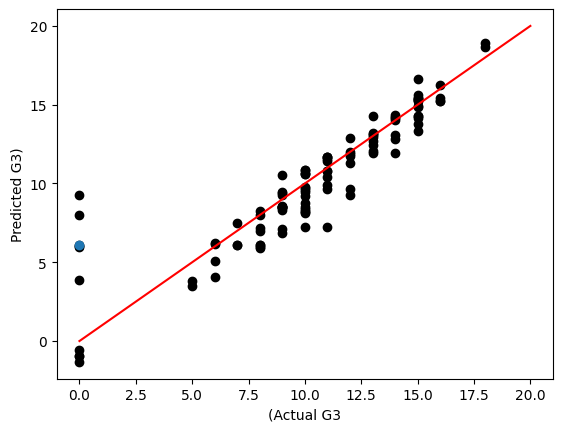

In [61]:
# visualization
plt.scatter(y_test, y_test_predict,  color='black')
plt.scatter(y_test[idx], y_test_predict[idx])
plt.xlabel('(Actual G3')
plt.ylabel('Predicted G3)')
plt.plot([df_final['G3'].min(), df_final['G3'].max()], [df_final['G3'].min(), df_final['G3'].max()], color='red')
plt.show()

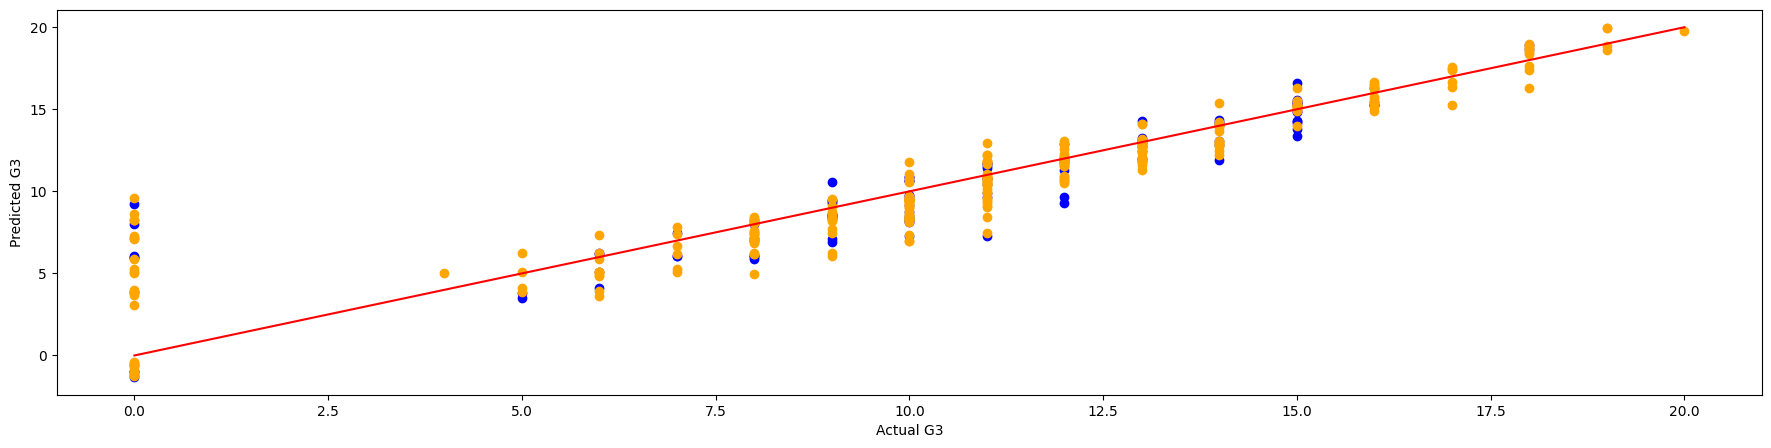

In [62]:
plt.figure(figsize=(22,5))
plt.scatter(y_test, y_test_predict,  color='blue')
plt.scatter(y_train, y_train_predict,  color='Orange')
plt.plot([df_final['G3'].min(), df_final['G3'].max()], [df_final['G3'].min(), df_final['G3'].max()], color='red')
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.show() 

In [ ]:
# downlodel the model
from jupyter import files

files.download('model.pkl')